In [ ]:
"""The purpose of this script is to show BSG how to create a batch ML model.  It will operate on plenty of assumptions, this is simply a template.  Ideally, this would be run daily (or more frequently) on player stats as a batch inference job."""
"""BSG can take that information and "flag" the player for further analysis."""
"""On top of the ML model on player statistics, it's reccomended to put raw physics-based heuristics.  For example, if a player's height exceeds some factor higher than the maximum height in the game, instant ban. Another example is if the player velocity exceeds terminal velocity in the game."""
"""Physics metadata can be recorded simply by keeping track of the max/min metrics in interest (speed, height, etc.)."""

In [1]:
"""First disclaimer: data is being randomly generated according to normal distributions within reasonable ranges based on first-hand knowledge of the game."""
# import libraries needed
import numpy as np
import pandas as pd
import names

In [2]:
NUM_PLAYERS = 100000

In [3]:
# instantiate a player stats dicionary to store different randomly generated stats
player_stats = {}

In [4]:
names_list = []
for i in range(NUM_PLAYERS):
    names_list.append(names.get_full_name())

In [5]:
player_stats["names"] = names_list

In [6]:
def int_continuous(lower_range_of_stat, upper_range_of_stat):
    stat = np.random.randint(
        lower_range_of_stat,
        upper_range_of_stat,
        size=NUM_PLAYERS,
    )
    stat = stat.T
    return stat

In [7]:
def gaussian(mu, sigma):
    stat = np.random.normal(
        mu,
        sigma,
        size=NUM_PLAYERS,
    )
    stat = stat.T
    return stat

In [8]:
def log_normal(mu, sigma):
    stat = np.random.lognormal(
        mu,
        sigma,
        size=NUM_PLAYERS,
    )
    stat = stat.T
    return stat

In [9]:
def binary_rng():
    stat = np.random.choice([0, 1], size=NUM_PLAYERS)
    stat = stat.T
    return stat

In [10]:
# TODO
# model player account type (binary)
# model player status (sherpa, dev, streamer, emissary)
# model player level


In [11]:
kd = gaussian(3.5, 1.5)
player_stats["kd"] = kd

In [12]:
player_level = int_continuous(
    1,
    70
)
player_stats["player_level"] = player_level

In [13]:
stash_value = int_continuous(0, 10000000)
player_stats["stash_value"] = stash_value

In [14]:
player_account_type = binary_rng()
player_stats["account_type"] = player_account_type

In [15]:
# survival_rate = np.random.rand(NUM_PLAYERS)
survival_rate = gaussian(.3, .1)
player_stats["survival_rate"] = survival_rate


In [16]:
avg_life_span = gaussian(18, 7)
player_stats["avg_life_span"] = avg_life_span

In [17]:
account_lifetime = gaussian(500, 150)
player_stats["account_lifetime"] = account_lifetime

In [18]:
longest_streak = gaussian(7, 2)
player_stats["longest_streak"] = longest_streak

In [73]:
df = pd.DataFrame.from_dict(player_stats)

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+01, 5.000e+00, 5.000e+00, 2.100e+01, 1.700e+01,
        2.100e+01, 3.200e+01, 3.500e+01, 6.700e+01, 7.700e+01, 9.000e+01,
        1.300e+02, 1.530e+02, 1.440e+02, 2.220e+02, 2.860e+02, 3.320e+02,
        4.030e+02, 4.610e+02, 5.270e+02, 6.570e+02, 7.530e+02, 8.620e+02,
        1.030e+03, 1.172e+03, 1.342e+03, 1.495e+03, 1.752e+03, 1.836e+03,
        2.064e+03, 2.277e+03, 2.422e+03, 2.593e+03, 2.746e+03, 2.884e+03,
        3.039e+03, 3.199e+03, 3.376e+03, 3.354e+03, 3.357e+03, 3.504e+03,
        3.376e+03, 3.475e+03, 3.487e+03, 3.454e+03, 3.338e+03, 3.145e+03,
        3.040e+03, 2.853e+03, 2.709e+03, 2.611e+03, 2.378e+03, 2.142e+03,
        2.013e+03, 1.805e+03, 1.597e+03, 1.409e+03, 1.241e+03, 1.151e+03,
        9.950e+02, 8.250e+02, 7.420e+02, 6.020e+02, 5.470e+02, 4.570e+02,
        3.660e+02, 2.900e+02, 2.490e+02, 1.780e+02, 1.700e+02, 1.320e+02,
        1.080e+02, 9.100e+01, 5.600e+0

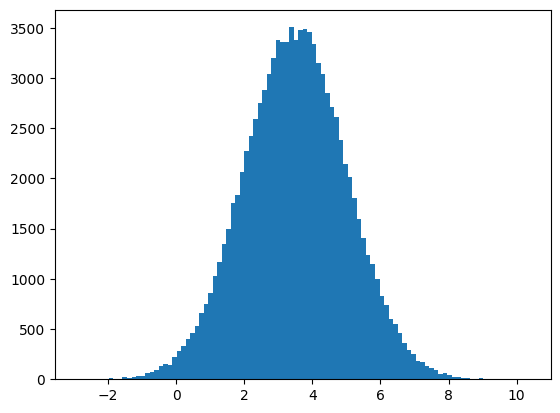

In [74]:
import matplotlib.pyplot as plt
plt.hist(
    kd, 
    bins=100,
)

(array([ 988., 1028., 1010.,  998., 1048., 1018., 1067., 1015.,  966.,
        1024., 1003.,  970., 1018.,  956., 1068., 1043.,  950.,  959.,
        1008.,  984., 1000.,  994.,  987., 1000., 1033., 1072., 1065.,
        1005., 1005.,  993.,  993.,  918.,  942., 1020., 1015.,  962.,
        1008., 1025.,  960.,  883.,  975., 1026., 1079., 1003.,  996.,
         979., 1039.,  992.,  993.,  973.,  993.,  985.,  991.,  988.,
         998., 1023., 1034.,  946.,  992.,  981.,  967., 1008., 1047.,
         995., 1020., 1014., 1036., 1008.,  946.,  976.,  959., 1046.,
        1010., 1015., 1004.,  954.,  993.,  983., 1012., 1001.,  980.,
         994.,  994., 1016.,  995., 1024.,  950., 1008.,  979.,  979.,
        1043., 1015., 1034., 1028.,  953., 1027., 1036.,  979.,  995.,
         990.]),
 array([1.91000000e+02, 1.00188560e+05, 2.00186120e+05, 3.00183680e+05,
        4.00181240e+05, 5.00178800e+05, 6.00176360e+05, 7.00173920e+05,
        8.00171480e+05, 9.00169040e+05, 1.00016660e+06, 1.

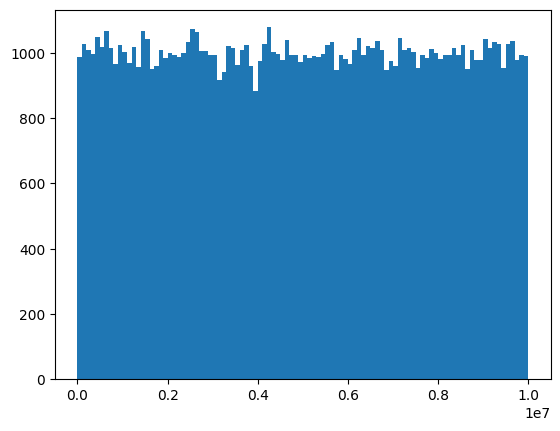

In [75]:
plt.hist(
    stash_value, 
    bins=100,
)

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 9.000e+00,
        1.400e+01, 2.500e+01, 2.400e+01, 2.600e+01, 3.800e+01, 4.700e+01,
        6.500e+01, 8.000e+01, 1.040e+02, 1.060e+02, 1.640e+02, 1.980e+02,
        2.760e+02, 3.000e+02, 3.750e+02, 4.350e+02, 5.250e+02, 5.900e+02,
        7.300e+02, 8.730e+02, 1.008e+03, 1.076e+03, 1.354e+03, 1.483e+03,
        1.662e+03, 1.780e+03, 2.026e+03, 2.137e+03, 2.376e+03, 2.555e+03,
        2.916e+03, 2.905e+03, 3.056e+03, 3.336e+03, 3.308e+03, 3.474e+03,
        3.498e+03, 3.431e+03, 3.441e+03, 3.556e+03, 3.582e+03, 3.385e+03,
        3.322e+03, 3.191e+03, 3.072e+03, 2.918e+03, 2.740e+03, 2.561e+03,
        2.320e+03, 2.104e+03, 1.964e+03, 1.857e+03, 1.670e+03, 1.477e+03,
        1.307e+03, 1.126e+03, 9.920e+02, 8.240e+02, 7.630e+02, 6.030e+02,
        5.750e+02, 4.380e+02, 3.910e+02, 3.090e+02, 2.410e+02, 1.890e+02,
        1.460e+02, 1.090e+02, 9.600e+0

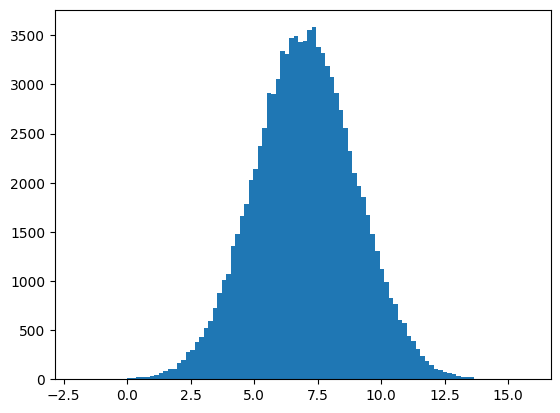

In [76]:
plt.hist(
    longest_streak, 
    bins=100,
)

In [77]:
df.head()

,names,kd,player_level,stash_value,account_type,survival_rate,avg_life_span,account_lifetime,longest_streak
0,Norma Chacon,4.184169,65,7914470,1,0.250373,14.449391,684.890752,6.957507
1,William Turner,0.833718,10,7157493,1,0.219045,19.217771,427.932404,7.063286
2,Daisy Arnett,3.948871,65,103392,1,0.454564,23.721767,551.239680,6.540123
3,Carmen Lopez,3.726389,33,9346378,0,0.327423,8.750901,432.762564,6.179769
4,Mark Raebel,4.166371,62,4887097,1,0.228763,16.028433,650.547363,8.877023


In [78]:
df.to_csv("test.csv")

In [79]:
# df = df.drop(["names"], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, X_train_names, X_test_names = train_test_split(
    df.drop(["names"], axis=1),
    df['names'],
    test_size = 0.2,
    random_state=0,
)

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=6
)
kmeans.fit(X_train)

c:\Users\jburd\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [116]:
# headers      kd	        player_level  stash_value	 account_type	survival_rate	avg_life_span	account_lifetime	longest_streak
# sample data  4.184169112	65	          7914470	     1	             0.250373286	14.44939054	    684.8907521	         6.957507089


In [117]:
# test_payload = np.array([4.184169112, 65, 7914470, 1, 0.250373286, 14.44939054, 684.8907521, 6.957507089])
# np.reshape(test_payload, (0,8))
# test_payload.shape

In [118]:
X_test.shape

(20000, 8)

In [119]:
predictions = kmeans.predict(X_test)
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('predictions.csv')

X_test_names.shape

(20000,)

In [120]:
X_test_names = np.array(X_test_names)

In [121]:
type(X_test_names)

numpy.ndarray

In [122]:
joined_data = np.vstack([predictions, X_test_names])
joined_data = joined_data.T
joined_data.shape

(20000, 2)

In [123]:
joined_data_df = pd.DataFrame(joined_data)
joined_data_df.head()

,0,1
0,0,Rita Matthews
1,0,Lisa Lucchese
2,2,Stephanie Mchaney
3,0,Ella Pendarvis
4,4,Sharon Young


In [124]:
joined_data_df.to_csv('labeled_preds.csv')